In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pyfastx
import os
import h5py

In [3]:
def plot_side(arr, ylim=[-2, 2.5], xticks=[], yticks=[0, 2], pic_name=None):
    assert arr.shape[0] % 2 == 0, "arr must have even length."
    midpoint = int(arr.shape[0]/2)
    pl = arr[:midpoint]
    mn = arr[midpoint:]
    plt.bar(range(pl.shape[0]), pl, width=2, color="r",)
    plt.bar(range(mn.shape[0]), -mn, width=2, color="b")
    axes = plt.gca()
    axes.set_ylim(ylim)
    axes.set_yticks(yticks)
    axes.set_xticks(xticks)
    axes.spines[["right", "top", "bottom"]].set_visible(False)
    plt.xlim(-0.5, pl.shape[0]-.5)
    
    if pic_name is None:
        plt.show()
    else:
        plt.savefig(pic_name, transparent=True)
        plt.close()

In [4]:
server = "cbsu"
mnt = "/home2/ayh8/"
predict_dir = "predictions/ensemble/examples/"
data_dir = "data/gse110638/examples/"
fasta_fp = "concat_sequence.fna.gz"
procap_fp = "concat_procap.npz"
prediction_fp = "ensemble_examples_prediction.h5"
workdir = "/Users/adamhe/github/scratch/examples"

In [5]:
os.makedirs(workdir, exist_ok=True)
print(f"scp {server}:{os.path.join(mnt, data_dir, fasta_fp)} {workdir}")
print(f"scp {server}:{os.path.join(mnt, data_dir, procap_fp)} {workdir}")
print(f"scp {server}:{os.path.join(mnt, predict_dir, prediction_fp)} {workdir}")

scp cbsu:/home2/ayh8/data/gse110638/examples/concat_sequence.fna.gz /Users/adamhe/github/scratch/examples
scp cbsu:/home2/ayh8/data/gse110638/examples/concat_procap.npz /Users/adamhe/github/scratch/examples
scp cbsu:/home2/ayh8/predictions/ensemble/examples/ensemble_examples_prediction.h5 /Users/adamhe/github/scratch/examples


In [6]:
fasta = pyfastx.Fasta(os.path.join(workdir, fasta_fp))
tracks = h5py.File(os.path.join(workdir, prediction_fp))["track"]
quantity = h5py.File(os.path.join(workdir, prediction_fp))["quantity"]
y = np.load(os.path.join(workdir, procap_fp))["arr_0"][:, np.r_[250:750, 1250:1750]]
seqs = pyfastx.Fasta(os.path.join(workdir, fasta_fp))
ids = [rec.name for rec in seqs]

In [7]:
y_norm = tracks / np.array(tracks).sum(axis=1, keepdims=True)
y_pred_scaled = y_norm * quantity

In [9]:
#mx1_coord = "chr21:41425651-41426650"
#mx1_ids = [idx.split("_")[-1] == mx1_coord for idx in ids]
#plot_side(np.mean(y[mx1_ids], axis=0), ylim=[-40, 50],  yticks=[0, 40], pic_name="ensemble_mx1_prom_expt.pdf")
#plot_side(np.mean(y_pred_scaled[mx1_ids], axis=0), ylim=[-4, 5], yticks=[0, 4], pic_name="ensemble_mx1_prom_pred.pdf")

ifnar2_coord = "chr21:33229367-33230366"
ints6_coord = "chr13:51452691-51453690"
ttll9_enh_coord = "chr20:31894784-31895783" # EH38E2106518
EH38E2695789_enh_coord = "chr9:70418561-70419560" # EH38E2695789, EH38E2695790
klf9_enh_coord = "chr9:70411667-70412666" # EH38E2695773
klf9_dt_enh_coord = "chr9:70419676-70420675" # EH38E2695794, EH38E2695793
kif3b_enh_coord = "chr20:32285520-32286519" # KIF3B, EH38E2106824, EH38E2106825
EH38E2107427_enh_coord = "chr20:32971851-32972850" # EH38E2107427
NASP_prom_coord = "chr1:45583513-45584512" # NASP

ifnar2_ids = [idx.split("_")[-1] == ifnar2_coord for idx in ids]
ints6_ids = [idx.split("_")[-1] == ints6_coord for idx in ids]
ttll9_enh_ids = [idx.split("_")[-1] == ttll9_enh_coord for idx in ids]
EH38E2695789_enh_ids = [idx.split("_")[-1] == EH38E2695789_enh_coord for idx in ids]
klf9_enh_ids = [idx.split("_")[-1] == klf9_enh_coord for idx in ids]
klf9_dt_enh_ids = [idx.split("_")[-1] == klf9_dt_enh_coord for idx in ids]
kif3b_enh_ids = [idx.split("_")[-1] == kif3b_enh_coord for idx in ids]
EH38E2107427_enh_ids = [idx.split("_")[-1] == EH38E2107427_enh_coord for idx in ids]
NASP_prom_ids = [idx.split("_")[-1] == NASP_prom_coord for idx in ids]

In [57]:
plot_side(np.mean(y[ifnar2_ids], axis=0), ylim=[-1.5, 15], yticks=[0, 15], pic_name="ensemble_ifnar2_prom_expt.pdf")

In [58]:
plot_side(np.mean(y_pred_scaled[ifnar2_ids], axis=0), ylim=[-0.3, 3], yticks=[0, 3], pic_name="ensemble_ifnar2_prom_pred.pdf")

In [37]:
plot_side(np.mean(y[ints6_ids], axis=0), ylim=[-100, 33], yticks=[-100, 0], pic_name="ensemble_ints6_prom_expt.pdf")

In [36]:
plot_side(np.mean(y_pred_scaled[ints6_ids], axis=0), ylim=[-12, 4], yticks=[-12, 0], pic_name="ensemble_ints6_prom_pred.pdf")

In [66]:
plot_side(np.mean(y[klf9_dt_enh_ids], axis=0), ylim=[-3, 7], yticks=[0, 7], pic_name="ensemble_klf9_dt_enh_expt.pdf")

In [67]:
plot_side(np.mean(y_pred_scaled[klf9_dt_enh_ids], axis=0), ylim=[-0.6, 1.4], yticks=[0, 1.4], pic_name="ensemble_klf9_dt_enh_pred.pdf")

In [46]:
plot_side(np.mean(y[EH38E2107427_enh_ids], axis=0), ylim=[-0.8, 0.6], yticks=[0, 0.6], pic_name="ensemble_EH38E2107427_enh_expt.pdf")

In [47]:
plot_side(np.mean(y_pred_scaled[EH38E2107427_enh_ids], axis=0), ylim=[-0.6, 0.45], yticks=[0, 0.45], pic_name="ensemble_EH38E2107427_enh_pred.pdf")

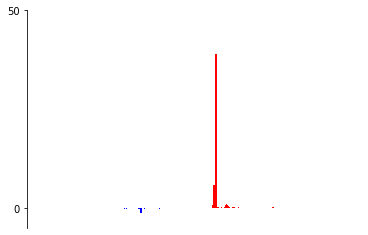

In [17]:
plot_side(np.mean(y[NASP_prom_ids], axis=0), ylim=[-5, 50], yticks=[0, 50])#, pic_name="ensemble_EH38E2107427_enh_pred.pdf")

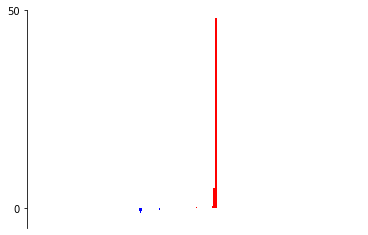

In [16]:
plot_side(np.mean(y_pred_scaled[NASP_prom_ids], axis=0), ylim=[-5, 50], yticks=[0, 50])#, pic_name="ensemble_EH38E2107427_enh_pred.pdf")

In [11]:
pearsonr(np.mean(y[NASP_prom_ids], axis=0), np.mean(y_pred_scaled[NASP_prom_ids], axis=0))

(0.9957143170896885, 0.0)

In [32]:
pearsonr(np.mean(y[EH38E2107427_enh_ids], axis=0), np.mean(y_pred_scaled[EH38E2107427_enh_ids], axis=0))

(0.7705819532242172, 1.897634650716049e-197)

In [29]:
plot_side(np.mean(y[mx1_enh_ids], axis=0), ylim=[-3.5, 4], yticks=[0, 2], pic_name="mx1_enh_expt.svg")

In [69]:
plot_side(np.mean(y_predict_scaled[mx1_enh_ids], axis=0), ylim=[-0.5, 0.6], yticks=[0, 0.5], pic_name="mx1_enh_pred.svg")

In [42]:
plot_side(np.mean(y[cd19_ids], axis=0), ylim=[-3.5, 3], yticks=[0, 2], pic_name="cd19_expt.svg")

In [43]:
plot_side(np.mean(y_predict_scaled[cd19_ids], axis=0), ylim=[-3.5, 3], yticks=[0, 2], pic_name="cd19_pred.svg")

In [44]:
plot_side(np.mean(y[il4r_ids], axis=0), ylim=[-1, 2], yticks=[0, 2], pic_name="il4r_expt.svg")

In [45]:
plot_side(np.mean(y_predict_scaled[il4r_ids], axis=0), ylim=[-3.25, 6], yticks=[0, 5], pic_name="il4r_pred.svg")

In [46]:
plot_side(np.mean(y[cd79a_ids], axis=0), ylim=[-1, 6.5], yticks=[0, 5], pic_name="cd79a_expt.svg")

In [47]:
plot_side(np.mean(y_predict_scaled[cd79a_ids], axis=0), ylim=[-1, 6.5], yticks=[0, 5], pic_name="cd79a_pred.svg")

In [65]:
plot_side(np.mean(y[aicda_ids], axis=0), ylim=[-1.6, 0.5], yticks=[-1, 0], pic_name="aicda_expt.svg")

In [64]:
plot_side(np.mean(y_predict_scaled[aicda_ids], axis=0), ylim=[-1.6, 0.5], yticks=[0, -1], pic_name="aicda_pred.svg")

In [50]:
plot_side(np.mean(y_predict_scaled[ifnar2_ids], axis=0), ylim=[-0.2, 2], yticks=[0, 2], pic_name="ifnar2_pred.svg")

In [51]:
plot_side(np.mean(y[ifnar2_ids], axis=0), ylim=[-1.5, 13], yticks=[0, 10], pic_name="ifnar2_expt.svg")

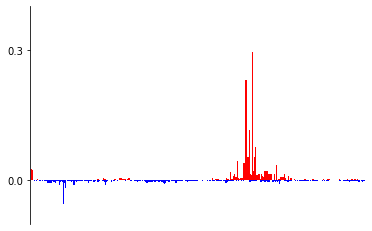

In [52]:
plot_side(np.mean(y[EH38E1591323_ids], axis=0), ylim=[-0.1, 0.4], yticks=[0, 0.3])

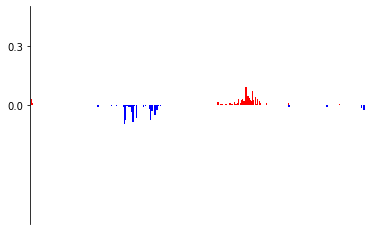

In [53]:
plot_side(np.mean(y_predict_scaled[EH38E1591323_ids], axis=0), ylim=[-0.6, 0.5], yticks=[0, 0.3])

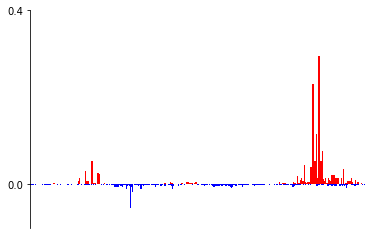

In [54]:
plot_side(np.mean(y[EH38E1591322_ids], axis=0), ylim=[-0.1, 0.4], yticks=[0, 0.4])

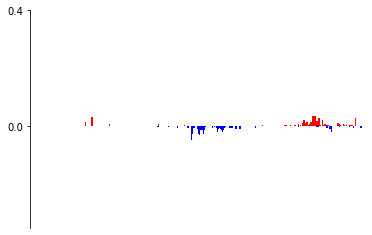

In [55]:
plot_side(np.mean(y_predict_scaled[EH38E1591322_ids], axis=0), ylim=[-0.35, 0.4], yticks=[0, 0.4])

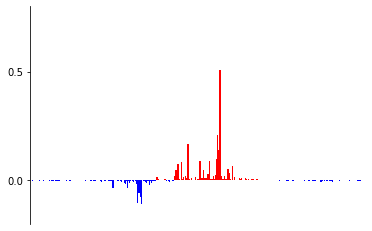

In [56]:
plot_side(np.mean(y[EH38E1591311_ids], axis=0), ylim=[-0.2, 0.8], yticks=[0, 0.5])

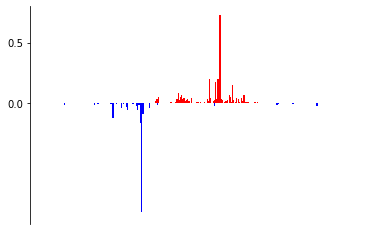

In [62]:
plot_side(np.mean(y_predict_scaled[EH38E1591311_ids], axis=0), ylim=[-1, 0.8], yticks=[0, 0.5])

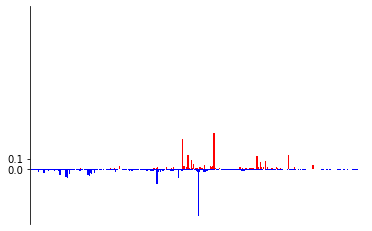

In [31]:
plot_side(np.mean(y[aicda_int0_enh_ids], axis=0), ylim=[-0.5, 1.5], yticks=[0, 0.1])

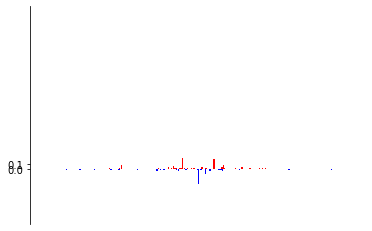

In [70]:
plot_side(np.mean(y_predict_scaled[aicda_int0_enh_ids], axis=0), ylim=[-1, 3], yticks=[0, 0.1])

In [75]:
plot_side(np.mean(y_predict_scaled[bcl2_enh0_ids], axis=0), ylim=[-2, 1], yticks=[0, 0.5], pic_name="bcl2_enh0_pred.svg")

In [74]:
plot_side(np.mean(y[bcl2_enh0_ids], axis=0), ylim=[-1.5, 0.8], yticks=[0, 0.5], pic_name="bcl2_enh0_expt.svg")

In [76]:
plot_side(np.mean(y[bcl2_enh1_ids], axis=0), ylim=[-0.3, 1.1], yticks=[0, 1], pic_name="bcl2_enh1_expt.svg")

In [77]:
plot_side(np.mean(y_predict_scaled[bcl2_enh1_ids], axis=0), ylim=[-2, 4.5], yticks=[0, 4], pic_name="bcl2_enh1_pred.svg")

In [47]:
plot_side(np.mean(y[cxcr4_enh_ids], axis=0), ylim=[-2.5, 2], yticks=[0, 1], pic_name="cxcr4_enh_expt.svg")

In [82]:
plot_side(np.mean(y_predict_scaled[cxcr4_enh_ids], axis=0), ylim=[-2, 2], yticks=[0, 1], pic_name="cxcr4_enh_pred.svg")

In [78]:
plot_side(np.mean(y[bcl2_enh2_ids], axis=0), ylim=[-1.1, 1.3], yticks=[0, 1], pic_name="bcl2_enh2_expt.svg")

In [80]:
plot_side(np.mean(y_predict_scaled[bcl2_enh2_ids], axis=0), ylim=[-1.1, 1.3], yticks=[0, 1], pic_name="bcl2_enh2_pred.svg")

In [51]:
plot_side(np.mean(y[bcl2_enh3_ids], axis=0), ylim=[-0.6, 0.35], yticks=[0, 0.3], pic_name="bcl2_enh3_expt.svg")

In [52]:
plot_side(np.mean(y_predict_scaled[bcl2_enh3_ids], axis=0), ylim=[-3, 2], yticks=[0, 2], pic_name="bcl2_enh3_pred.svg")

In [53]:
plot_side(np.mean(y[bcl2_enh4_ids], axis=0), ylim=[-0.5, 0.6], yticks=[0, 0.5], pic_name="bcl2_enh4_expt.svg")

In [54]:
plot_side(np.mean(y_predict_scaled[bcl2_enh4_ids], axis=0), ylim=[-1.5, 3.5], yticks=[0, 3], pic_name="bcl2_enh4_pred.svg")

In [55]:
pearsonr(np.mean(y[cd19_ids], axis=0), np.mean(y_predict[cd19_ids], axis=0))

(0.8454083052104855, 4.561023134712453e-274)

In [56]:
pearsonr(np.mean(y[aicda_ids], axis=0), np.mean(y_predict[aicda_ids], axis=0))

(0.7623184221000543, 8.66340715406032e-191)

In [57]:
pearsonr(np.mean(y[cxcr4_enh_ids], axis=0), np.mean(y_predict[cxcr4_enh_ids], axis=0))

(0.9103581519495697, 0.0)

In [58]:
pearsonr(np.mean(y[bcl2_enh2_ids], axis=0), np.mean(y_predict[bcl2_enh2_ids], axis=0))

(0.7549535384287415, 4.441545627764221e-185)

In [59]:
pearsonr(np.mean(y[bcl2_enh0_ids], axis=0), np.mean(y_predict[bcl2_enh0_ids], axis=0))

(0.9105011851634672, 0.0)

In [60]:
pd.DataFrame(y[bcl2_enh0_ids]).corrwith(pd.DataFrame(y_predict[bcl2_enh0_ids]), axis=1).mean()

0.787409589985215

In [61]:
pd.DataFrame(y[aicda_ids]).corrwith(pd.DataFrame(y_predict[aicda_ids]), axis=1).mean()

0.7027814083887055

In [62]:
pd.DataFrame(y[cd19_ids]).corrwith(pd.DataFrame(y_predict[cd19_ids]), axis=1).mean()

0.7740426122300527